In [4]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [3]:
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

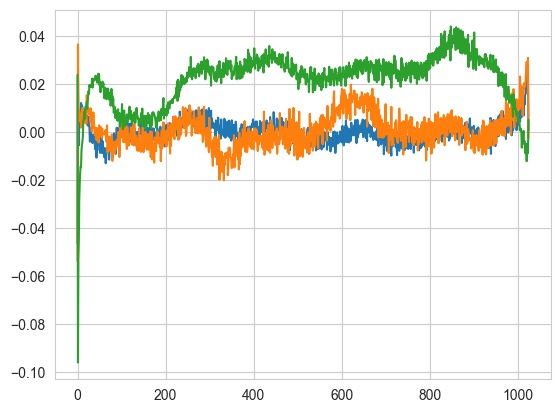

In [7]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])

In [8]:
from transformers import set_seed, pipeline

In [11]:
generator = pipeline("text-generation", model="gpt2")
set_seed(18)
generator("I want to become an Applied Scientist", max_length=60, num_return_sequences=1)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I want to become an Applied Scientist so I can gain more experience and learn how to solve better problems and understand more and improve myself. It's not something I can do with all my hard work of creating new applications. We all live in a world that does not focus on solving problems that have been"}]

In [12]:
import torch

x = torch.zeros(768)
n = 100

for i in range(n):
    x = x + torch.randn(768)

print(x.std())


tensor(10.1056)


In [13]:
import torch

x = torch.zeros(768)
n = 100

for i in range(n):
    x = x + (n**-0.5) * torch.randn(768)

print(x.std())


tensor(0.9888)


In [22]:
a = torch.arange(1, 25)
aa = a.view(-1, 6)
print(aa)
b = torch.topk(aa, 3, dim=1)


tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24]])


torch.return_types.topk(
values=tensor([[ 6,  5,  4],
        [12, 11, 10],
        [18, 17, 16],
        [24, 23, 22]]),
indices=tensor([[5, 4, 3],
        [5, 4, 3],
        [5, 4, 3],
        [5, 4, 3]]))